In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [106]:
import seaborn as sns

In [2]:
import GPy

In [122]:
from GPy.util import choleskies

In [3]:
import scipy.io as sio

In [4]:
df = sio.loadmat('snelson1d.mat')
X = df['X']
Y = df['Y']
X_t = df['tX']
Y_t = df['tY']


In [5]:
M = 20
X_u = np.linspace(0,6, M)[:, None]
X_u_noisy = X_u + 0.1*np.random.rand(*X_u.shape) 

In [6]:
lik = GPy.likelihoods.Gaussian()
kern = GPy.kern.RBF(X.shape[1]) + GPy.kern.White(X.shape[1])
kern1 = GPy.kern.RBF(X.shape[1]) + GPy.kern.White(X.shape[1])

In [7]:

m1 = GPy.core.GP(X, Y, kernel=kern, likelihood=lik.copy())

In [8]:
print(m1)


Name : gp
Objective : 272.5565738936652
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |  value  |  constraints  |  priors
  sum.rbf.variance         |    1.0  |      +ve      |        
  sum.rbf.lengthscale      |    1.0  |      +ve      |        
  sum.white.variance       |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [9]:
m1.randomize()

In [10]:
m1.optimize('lbfgs')

In [11]:
print(m1)


Name : gp
Objective : 55.90027668942571
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |            value  |  constraints  |  priors
  sum.rbf.variance         |   0.769161956153  |      +ve      |        
  sum.rbf.lengthscale      |   0.612341826836  |      +ve      |        
  sum.white.variance       |  0.0385838028877  |      +ve      |        
  Gaussian_noise.variance  |  0.0410632703845  |      +ve      |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


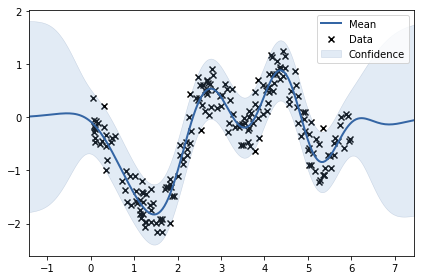

In [12]:
m1.plot()

In [13]:
gaussian_inference = GPy.inference.latent_function_inference.ExactGaussianInference()

In [14]:
m2 = GPy.core.GP(X, Y, kernel=kern1.copy(), likelihood=lik.copy(), inference_method=gaussian_inference)

In [15]:
print(m2)


Name : gp
Objective : 272.5565738936652
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |  value  |  constraints  |  priors
  sum.rbf.variance         |    1.0  |      +ve      |        
  sum.rbf.lengthscale      |    1.0  |      +ve      |        
  sum.white.variance       |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [16]:
m2.optimize('lbfgs')

In [17]:
print(m2)


Name : gp
Objective : 55.9002766893673
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |            value  |  constraints  |  priors
  sum.rbf.variance         |     0.7691643854  |      +ve      |        
  sum.rbf.lengthscale      |   0.612342652028  |      +ve      |        
  sum.white.variance       |  0.0398235570265  |      +ve      |        
  Gaussian_noise.variance  |  0.0398235570265  |      +ve      |        


In [18]:
laplace_inference = GPy.inference.latent_function_inference.Laplace()

In [19]:
m3 = GPy.core.GP(X, Y, kernel=kern1.copy(), likelihood=lik.copy(), inference_method=laplace_inference)

In [20]:
m3.optimize('lbfgs')

In [21]:
print(m3)


Name : gp
Objective : 55.900276689367196
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |            value  |  constraints  |  priors
  sum.rbf.variance         |   0.769164385365  |      +ve      |        
  sum.rbf.lengthscale      |   0.612342652024  |      +ve      |        
  sum.white.variance       |  0.0398235620243  |      +ve      |        
  Gaussian_noise.variance  |  0.0398235620287  |      +ve      |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


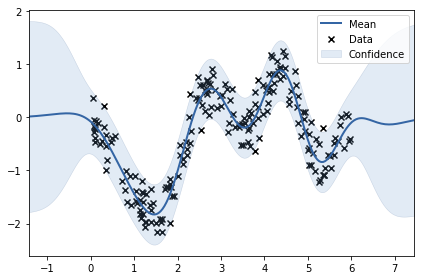

In [22]:
m2.plot()

In [23]:
fitc_inference = GPy.inference.latent_function_inference.FITC()
dtc_inference = GPy.inference.latent_function_inference.DTC()

In [24]:
# m4 = GPy.core.SparseGP(X, Y, Z=X_u_noisy, kernel=kern1.copy(), likelihood=lik.copy(), X_variance=None, inference_method=dtc_inference)

In [25]:
m5 = GPy.core.SparseGP(X, Y, Z=X_u_noisy.copy(), kernel=kern1.copy(),  likelihood=lik.copy(), inference_method=fitc_inference)

In [26]:
print(m5)


Name : sparse gp
Objective : 282.0260769884118
Number of Parameters : 24
Number of Optimization Parameters : 24
Updates : True
Parameters:
  sparse_gp.               |    value  |  constraints  |  priors
  inducing_inputs          |  (20, 1)  |               |        
  sum.rbf.variance         |      1.0  |      +ve      |        
  sum.rbf.lengthscale      |      1.0  |      +ve      |        
  sum.white.variance       |      1.0  |      +ve      |        
  Gaussian_noise.variance  |      1.0  |      +ve      |        


In [27]:
m5.optimize('lbfgs')

In [28]:
print(m5)


Name : sparse gp
Objective : 49.40746173915568
Number of Parameters : 24
Number of Optimization Parameters : 24
Updates : True
Parameters:
  sparse_gp.               |              value  |  constraints  |  priors
  inducing_inputs          |            (20, 1)  |               |        
  sum.rbf.variance         |     0.739193478226  |      +ve      |        
  sum.rbf.lengthscale      |     0.471553954129  |      +ve      |        
  sum.white.variance       |     0.030772926782  |      +ve      |        
  Gaussian_noise.variance  |  9.69931553417e-08  |      +ve      |        


In [29]:
m6 = GPy.core.GP(X, Y, kernel=kern1.copy(), likelihood=lik.copy(), inference_method=gaussian_inference)

In [30]:
# very general prior- non informative ..
gamma_prior3 = GPy.priors.Gamma.from_EV(1.0, 6.)

 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning:The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.


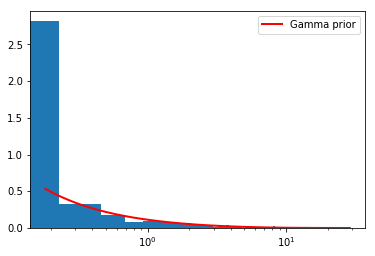

In [31]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_xscale('log')
_= gamma_prior3.plot()
ax1.legend(['Gamma prior'])

reconstraining parameters gp.sum.rbf.lengthscale
reconstraining parameters gp.sum.rbf.variance
reconstraining parameters gp.Gaussian_noise.variance
 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


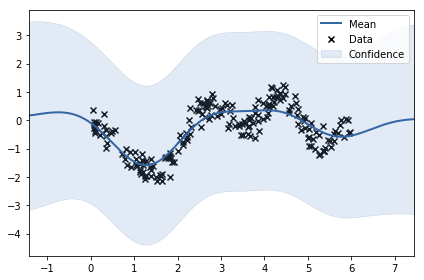

In [32]:
m6.kern.rbf.lengthscale.set_prior(gamma_prior3)
m6.kern.rbf.variance.set_prior(gamma_prior3)
m6.likelihood.variance.set_prior(gamma_prior3)
_=m6.plot()

In [33]:
hmc = GPy.inference.mcmc.HMC(m6, stepsize=5e-2)
# Burnin
s = hmc.sample(num_samples=1000)
s = hmc.sample(num_samples=2000)

In [34]:
samples = s[500:]
# thinning
samples = samples[::2]
labels = ['signal_variance' , 'lengthscale', 'noise_variance']

In [37]:
print(samples.shape)

(750, 4)


Text(0,0.5,'noise_variance')

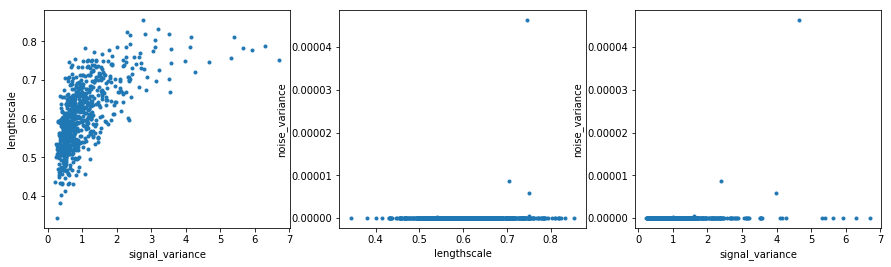

In [36]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131)
_=ax.plot(samples[:,0],samples[:,1],'.')
ax.set_xlabel(labels[0]); ax.set_ylabel(labels[1])
ax = fig.add_subplot(132)
_=ax.plot(samples[:,1],samples[:,2],'.')
ax.set_xlabel(labels[1]); ax.set_ylabel(labels[2])
ax = fig.add_subplot(133)
_=ax.plot(samples[:,0],samples[:,2],'.')
ax.set_xlabel(labels[0]); ax.set_ylabel(labels[2])


In [39]:
alpha_samples = samples[:,0]
rho_samples = samples[:,1]
sigma_samples = samples[:,2]

In [87]:
mean_values = np.mean(samples, axis=0)


Name : gp
Objective : 403.8690942133315
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                      |              value  |  constraints  |      priors    
  sum.rbf.variance         |     0.966901812394  |      +ve      |  Ga(0.17, 0.17)
  sum.rbf.lengthscale      |     0.608415580874  |      +ve      |  Ga(0.17, 0.17)
  sum.white.variance       |  4.18467526451e-12  |      +ve      |                
  Gaussian_noise.variance  |    0.0122203864101  |      +ve      |  Ga(0.17, 0.17)


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


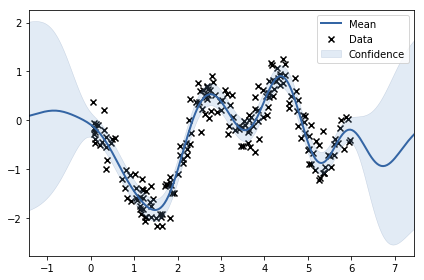

In [88]:
# set the model parameters at the posterior mean
m6.kern.rbf.variance[:] = mean_values[0]
m6.kern.rbf.lengthscale[:] = mean_values[1]
m6.likelihood.variance[:] = mean_values[2]
print(m6)
m6.plot()

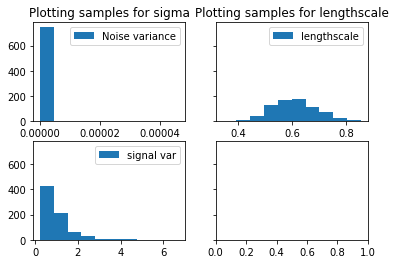

In [40]:
f, axs = plt.subplots(2,2, sharey=True)
axs[0,0].hist(sigma_samples)
axs[0,0].set_title('Plotting samples for sigma')
axs[0,0].legend(['Noise variance'])
axs[0,1].hist(rho_samples)
axs[0,1].set_title('Plotting samples for lengthscale')
axs[0,1].legend(['lengthscale'])
axs[1,0].hist(alpha_samples)
# axs[1,0].set_title('Plotting samples for signalvariance')
axs[1,0].legend(['signal var'])


In [ ]:
M = 20

In [53]:
Z = np.linspace(0, 6, M)[:,None]

In [54]:
print(X.shape)
print(Z.shape)

(200, 1)
(20, 1)


In [46]:
l_sq_stan_map = 0.70
rho_sq_stan_map = 0.90
sigma_sq_stan_map = 0.29


In [47]:
l_stan_map = np.sqrt(l_sq_stan_map)
rho_stan_map = np.sqrt(rho_sq_stan_map)
sigma_stan_map = np.sqrt(sigma_sq_stan_map)

In [55]:
kern2 = GPy.kern.RBF(X.shape[1], variance=rho_sq_stan_map, lengthscale=l_stan_map) + GPy.kern.White(X.shape[1], variance=sigma_sq_stan_map)

In [56]:
m_var = GPy.core.SVGP(X, Y, kernel=kern2.copy(), likelihood=lik.copy(), Z=Z)

In [57]:
print(m_var)


Name : SVGP
Objective : 336.50841286037627
Number of Parameters : 254
Number of Optimization Parameters : 254
Updates : True
Parameters:
  SVGP.                    |           value  |  constraints  |  priors
  inducing_inputs          |         (20, 1)  |               |        
  sum.rbf.variance         |             0.9  |      +ve      |        
  sum.rbf.lengthscale      |  0.836660026534  |      +ve      |        
  sum.white.variance       |            0.29  |      +ve      |        
  Gaussian_noise.variance  |             1.0  |      +ve      |        
  q_u_chol                 |        (210, 1)  |               |        
  q_u_mean                 |         (20, 1)  |               |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


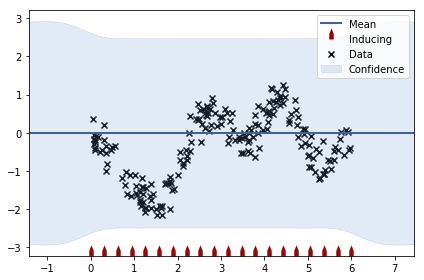

In [58]:
m_var.plot()

In [60]:
hmc_var = GPy.inference.mcmc.HMC(m_var, stepsize=5e-2)

In [61]:
m_var.Z.fix()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [63]:
m_var.optimize()

In [64]:
print(m_var)


Name : SVGP
Objective : 55.90973885827016
Number of Parameters : 254
Number of Optimization Parameters : 234
Updates : True
Parameters:
  SVGP.                    |              value  |  constraints  |  priors
  inducing_inputs          |            (20, 1)  |     fixed     |        
  sum.rbf.variance         |      0.76859361013  |      +ve      |        
  sum.rbf.lengthscale      |     0.612314883568  |      +ve      |        
  sum.white.variance       |  3.50516895706e-06  |      +ve      |        
  Gaussian_noise.variance  |    0.0796604184805  |      +ve      |        
  q_u_chol                 |           (210, 1)  |               |        
  q_u_mean                 |            (20, 1)  |               |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


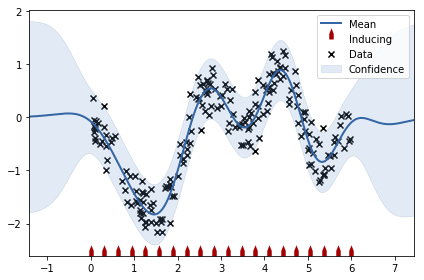

In [65]:
m_var.plot()

In [66]:
N_star = 30
X_star = np.linspace(-1,7,N_star)

In [81]:
m_var1 = GPy.core.SVGP(X, Y, kernel=kern2.copy(), likelihood=lik.copy(), Z=Z)

In [82]:
m_var1.Gaussian_noise.variance = 0.25
m_var1.Z.fix()
m_var1.kern.fix()
m_var1.likelihood.fix()

array([0])

In [83]:
m_var1.optimize()

In [84]:
print(m_var1)


Name : SVGP
Objective : 266.9036232260505
Number of Parameters : 254
Number of Optimization Parameters : 230
Updates : True
Parameters:
  SVGP.                    |           value  |  constraints  |  priors
  inducing_inputs          |         (20, 1)  |     fixed     |        
  sum.rbf.variance         |             0.9  |   +ve fixed   |        
  sum.rbf.lengthscale      |  0.836660026534  |   +ve fixed   |        
  sum.white.variance       |            0.29  |   +ve fixed   |        
  Gaussian_noise.variance  |            0.25  |   +ve fixed   |        
  q_u_chol                 |        (210, 1)  |               |        
  q_u_mean                 |         (20, 1)  |               |        


 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


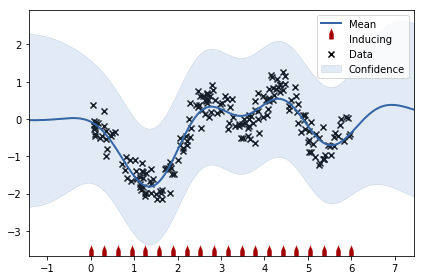

In [85]:
m_var1.plot()

In [93]:
M7 = 7
Z_7 = np.linspace(0,6, M7)[:,None]

In [94]:
m_var7 = GPy.core.SVGP(X, Y, kernel=kern2.copy(), likelihood=lik.copy(), Z=Z_7)

In [96]:
m_var7.Z.fix()

array([0, 1, 2, 3, 4, 5, 6])

In [97]:
m_var7.optimize()

 /u/26/dhakaa1/unix/anaconda2/envs/py35-elfi/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


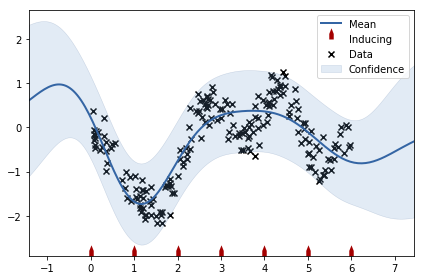

In [99]:
m_var7.plot()

In [100]:
print(m_var7)


Name : SVGP
Objective : 142.99139054525477
Number of Parameters : 46
Number of Optimization Parameters : 39
Updates : True
Parameters:
  SVGP.                    |              value  |  constraints  |  priors
  inducing_inputs          |             (7, 1)  |     fixed     |        
  sum.rbf.variance         |     0.652642620196  |      +ve      |        
  sum.rbf.lengthscale      |     0.967310181846  |      +ve      |        
  sum.white.variance       |  7.70350448706e-10  |      +ve      |        
  Gaussian_noise.variance  |       0.2103905146  |      +ve      |        
  q_u_chol                 |            (28, 1)  |               |        
  q_u_mean                 |             (7, 1)  |               |        


In [101]:
print(m_var7.q_u_mean)

  index  |  SVGP.q_u_mean  |  constraints  |  priors
  [0 0]  |     0.22957552  |               |        
  [1 0]  |    -1.67337691  |               |        
  [2 0]  |    -0.75969868  |               |        
  [3 0]  |     0.27554539  |               |        
  [4 0]  |     0.36142934  |               |        
  [5 0]  |    -0.10571476  |               |        
  [6 0]  |    -0.78178960  |               |        


In [120]:
print(m_var7.q_u_chol)

  index    |  SVGP.q_u_chol  |  constraints  |  priors
  [0 0]    |     0.12604094  |               |        
  [1 0]    |    -0.01461819  |               |        
  [2 0]    |    -0.08479003  |               |        
  [3 0]    |     0.01176533  |               |        
  [4 0]    |     0.00800570  |               |        
  [5 0]    |    -0.08208745  |               |        
  [6 0]    |    -0.00851687  |               |        
  [7 0]    |    -0.00644189  |               |        
  [8 0]    |     0.00553469  |               |        
  [9 0]    |    -0.07946020  |               |        
  [10  0]  |     0.00466584  |               |        
  [11  0]  |     0.00357151  |               |        
  [12  0]  |    -0.00283366  |               |        
  [13  0]  |     0.00038117  |               |        
  [14  0]  |    -0.07418014  |               |        
  [15  0]  |    -0.00427602  |               |        
  [16  0]  |    -0.00350323  |               |        
  [17  0] 

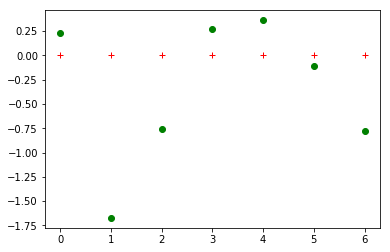

In [105]:
plt.plot(Z_7, m_var7.q_u_mean, 'go')
plt.plot(Z_7, np.zeros(Z_7.shape[0]), 'r+')

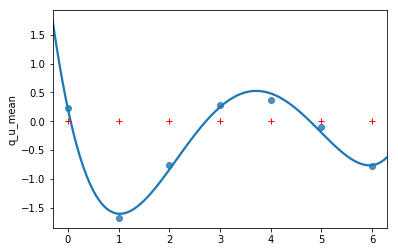

In [119]:
ax = sns.regplot(Z_7.flatten(), m_var7.q_u_mean.flatten(), order=4, ci=None)
ax.plot(Z_7, np.zeros(Z_7.shape[0]), 'r+')

In [129]:
L = choleskies._flat_to_triang_pure( m_var7.q_u_chol)[0]

In [131]:
Q_u_cov = np.dot(L, L.T)

In [133]:
Q_diag = np.diag(Q_u_cov)

In [143]:
print(Q_diag)
y_err = 2*np.sqrt(Q_diag)

[ 0.01588632  0.00740304  0.00694086  0.00645859  0.00554539  0.00692423
  0.0247183 ]


<ErrorbarContainer object of 3 artists>

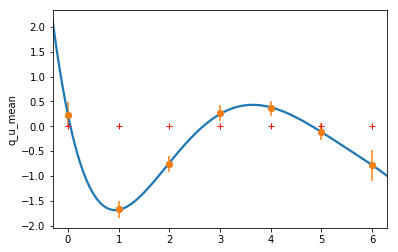

In [146]:
ax = sns.regplot(Z_7.flatten(), m_var7.q_u_mean.flatten(), order=5, ci=None)
ax.plot(Z_7, np.zeros(Z_7.shape[0]), 'r+')
ax.errorbar(x=Z_7.flatten(), y=m_var7.q_u_mean.flatten(), yerr=y_err, fmt='o')

In [147]:
a2 = np.random.multivariate_normal(f_fin, np.diag(cov_fin), 8)

NameError: name 'f_fin' is not defined